<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 25</b>: Aprendizaje no supervisado</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. ¿Aprendizaje no supervisado?](#nosupervisado)
  - [1.1. Aplicaciones](#aplicaciones)
  - [1.2. Desafíos](#desafios)
- [2. Clustering](#clustering)
  - [2.1. KMeans](#kmeans)
  - [2.2. Jerárquico](#jerarquico)
  - [2.3. DBScan](#dbscan)
- [3. Métricas para clustering](#metricas)
  - [3.1. Método del codo](#elbow)
  - [3.2. Indice silueta](#silhouette)
- [4. Reducción de dimensionalidad](#dimensionalidad)
  - [4.1. Análisis de Componentes Principales](#pca)
- [5. Links de interés](#links)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

In [ ]:
warnings.filterwarnings("ignore")

## 1. ¿Aprendizaje no supervisado? <a name="nosupervisado"></a>

<img src="https://drive.google.com/uc?export=view&id=19zYfuob5MTjbURFYFkYlM8CSg8RD4CVq" height="232" width="526" style="float: center;">

El aprendizaje no supervisado (unsupervised learning) es un tipo de aprendizaje automático en el que el modelo se entrena usando datos que no están etiquetados.

El objetivo principal del aprendizaje no supervisado es explorar la estructura inherente de los datos y extraer información valiosa sin ninguna guía explícita sobre qué buscar (supervización).

Hay dos tipos principales de técnicas de aprendizaje no supervisado:

- **Agrupamiento** (o clusterización): consiste en dividir el conjunto de datos en grupos (clusters) basados en similitudes o patrones en los datos.

- **Reducción de dimensionalidad** (dimensionality reduction): El objetivo es reducir la cantidad de características en el conjunto de datos sin perder información importante.

  Estas técnicas permiten representar los datos en un espacio de menor dimensión, facilitando la visualización y comprensión de la estructura de los datos.

### 1.1. Aplicaciones <a name="aplicaciones"></a>

- Agrupamiento de clientes: Identificar segmentos de clientes con comportamientos similares para estrategias de marketing.

- Detección de anomalías: Identificar datos atípicos o inusuales que no se ajustan a los patrones generales.

- Recomendación de productos: Sugerir productos basados en similitudes entre diferentes usuarios o ítems.

### 1.2. Desafíos <a name="desafios"></a>

- Interpretación de los resultados puede ser difícil, ya que no hay una referencia clara de lo que es correcto.

  Evaluar modelos de aprendizaje no supervisado puede ser un desafío, ya que no tenemos etiquetas o resultados conocidos para comparar directamente.

- Elección de hiperparámetros: La selección de la cantidad de clusters o componentes principales es generalmente subjetiva.

## 2. Clustering <a name="clustering"></a>

<img src="https://drive.google.com/uc?export=view&id=1QESDKSP80wD90ZaSrkacAI_foU-5lvtw" height="211" width="457" style="float: center;">

El clustering es una técnica del aprendizaje no supervisado que se utiliza para dividir un conjunto de datos en grupos basados en similitudes entre las observaciones.

El objetivo es agrupar elementos similares en un mismo cluster y separar observaciones diferentes en clusters distintos.

Este proceso ayuda a descubrir estructuras y patrones ocultos en los datos, que a simple vista no podemos determinar.

Existen varios algoritmos de clustering, pero los más comunes son: kMeans, clustering jerárquico o DBSCAN.

**Aplicaciones**:
- Segmentación de clientes en marketing.
- Análisis de redes sociales (generación de comunidades).
- Análisis de datos biológicos como interacción entre genes.


<img src="https://drive.google.com/uc?export=view&id=1gXQ3kLPeW0L2MMPMH4Ae5xuxV-FD49XO" height="262" width="358" style="float: center;">

### Terminología

- Cluster: Un grupo de datos que son similares entre sí.

- Centroide: El punto medio de un cluster, que se utiliza para definir la posición del cluster.

- Distancia: Medida de similitud entre dos puntos de datos. Las métricas de distancia comunes incluyen la distancia euclidiana, Manhattan y Coseno.

### 2.1. K-Means <a name="kmeans"></a>

Es uno de los algoritmos de clustering más populares.

Tiene como objetivo dividir un conjunto de datos en ***K*** clústeres (hiperparámetro), de manera que los puntos dentro de cada clúster sean similares entre sí y diferentes a los puntos en otros clústeres.

El reto de encontrar el K óptimo.

Este algoritmo es rápido y efectivo para el agrupamiento de datos, pero depende mucho del reparto inicial de centroides y no siempre encuentra la mejor solución global.

### Algoritmo

1. **Inicialización**: Toma k puntos al azar como los centros de cada grupo (centroide).

2. **Asignación**: Asigna cada dato al grupo más cercano. Basado en una medida de distancia.

  Esto se hace calculando la distancia entre cada punto y los centroides, y asignando el punto al cluster cuyo centroide tiene la distancia más pequeña.

3. **Actualización**: Ajusta los centroides tomando la media en cada grupo. Este paso reubica los centroides al centro geométrico de cada grupo.

4. **Iteración**: Repite 2 y 3 hasta que se cumple un criterio de parada (cantidad iteraciones o centros que no cambian).

5. **Resultado**. los puntos del conjunto de datos están agrupados en K clusters. Los grupos obtenidos representan conjuntos de puntos similares.


<img src="https://drive.google.com/uc?export=view&id=1p5OjMjXaEGdAz-aQymAUJloULcky_cb3" height="285" width="423" style="float: center;">

<img src="https://drive.google.com/uc?export=view&id=1WBfqJe9NUG746dIjq-grD-P0gV0rzp_Z" height="350" width="580" style="float: center;">

### Ejemplo

In [2]:
# Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples = 300, centers = 3, random_state = 42)

In [3]:
X

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

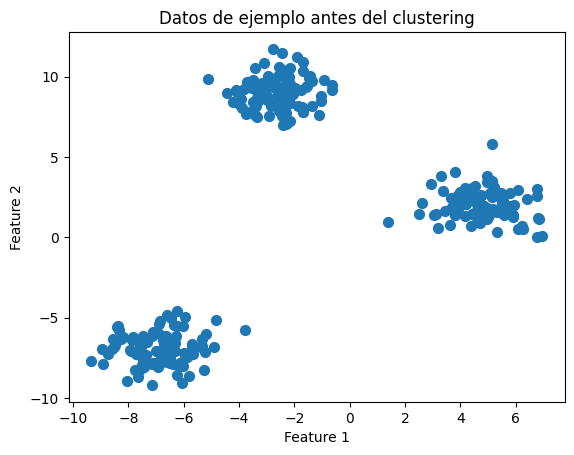

In [4]:
# Visualizar los datos antes del clustering
# s tamaño
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos de ejemplo antes del clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [21]:
# Entrenar el modelo
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

Una vez hemos entrenado el modelo podemos obtener las etiquetas de qué cluster se asocia a cada punto con el atributo `labels_` del modelo. También podemos obtener las coordenadas de los centroides de cada cluster con el atributo `cluster_centers_` del modelo.

In [22]:
# Obtener los centros de los clusters y las etiquetas
centroids = model.cluster_centers_
labels = model.labels_

In [7]:
centroids

array([[-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [ 4.74710337,  2.01059427]])

In [23]:
labels

array([1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1], d

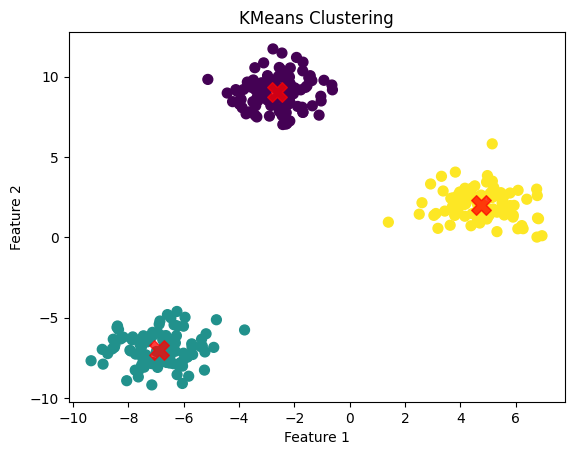

In [24]:
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [15]:
# Realizar predicciones con datos nuevos
new_data = np.array([[2, 3], [-5, -5], [-1, 8], [-1, -2.5]])
predictions = model.predict(new_data)

predictions

array([2, 1, 0, 2], dtype=int32)

### 2.2. Jerárquico <a name="jerarquico"></a>

El clustering jerárquico (Hierarchical Clustering) es una técnica de agrupamiento que busca construir una jerarquía de clusters.

A diferencia de KMeans, el clustering jerárquico no requiere especificar el número de clusters de antemano. En lugar de eso, crea una estructura de árbol  que representa cómo los puntos de datos se agrupan en diferentes niveles de similitud.

Elegiremos el K óptimo utilizando un dendograma.

Hay dos tipos principales de clustering jerárquico:

- Aglomerativo (bottom up): comienza con cada dato en un grupo distinto (propio). Se van agrupando grupos según sus similitudes.

- Divisivo (top down): comienza con todos los datos en un único cluster y se va dividiendo según similitudes.

El clustering jerárquico es útil cuando no se conoce el número óptimo de clústeres de antemano o cuando se desea explorar la estructura jerárquica de los datos. Sin embargo, puede ser computacionalmente costoso en conjuntos de datos grandes debido a la necesidad de calcular todas las distancias entre los puntos de datos.

<img src="https://drive.google.com/uc?export=view&id=1KcrQZv_E1bj0otqkKtJhYYC39W8jEy9s" height="268" width="550" style="float: center;">

### Dendograma

El resultado del clustering jerárquico se muestra en un dendrograma, que es un diagrama de árbol que muestra la jerarquía de los grupos. Los puntos de datos se encuentran en las hojas del árbol, y los clusters más grandes se forman combinando clusters más pequeños lo largo de las ramas del árbol.

Los cortes horizontales en el dendrograma determinan la cantidad de clústeres obtenidos al cortar el árbol a una cierta altura.

<img src="https://drive.google.com/uc?export=view&id=1pj_J3sb52F0rDco-FaEVAfrU0lqConJQ" height="256" width="450" style="float: center;">

### Ejemplo

In [28]:
# Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples = 100, centers = 3, random_state = 42)

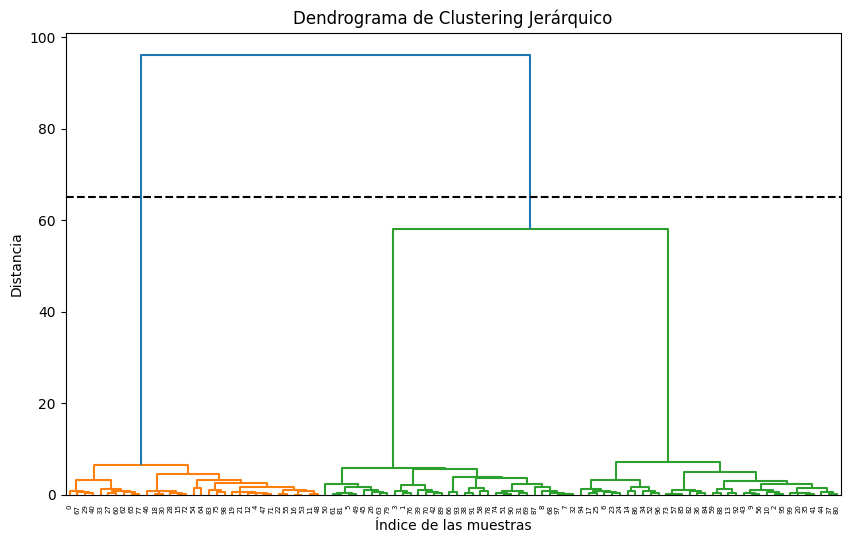

In [30]:
# Realizar el clustering jerárquico
Z = linkage(X, 'ward')

# Mostrar el dendrograma
plt.figure(figsize = (10, 6))

dendrogram(Z)
plt.axhline(c='k',linestyle='--', y=65)

plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de las muestras")
plt.ylabel("Distancia")
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters = 3)

hc.fit(X)

AgglomerativeClustering(n_clusters=3)

Text(0, 0.5, 'Feature 2')

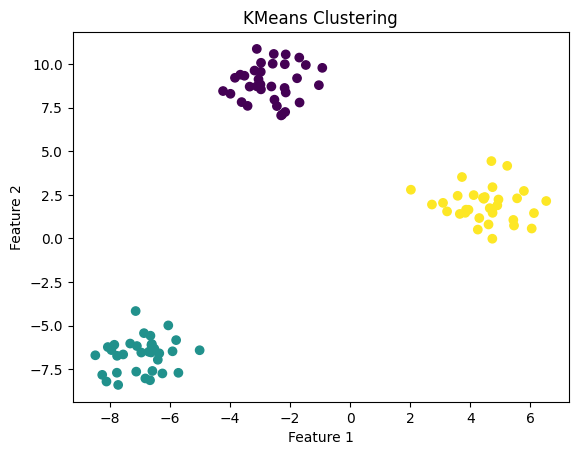

In [32]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c = hc.labels_)

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### 2.3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <a name="dbscan"></a>

Es capaz de encontrar clusters de forma arbitraria y detectar ruido (puntos que no pertenecen a ningún cluster).

A diferencia de métodos como KMeans, DBSCAN no requiere que se especifique el número de clusters de antemano.

Encuentra los grupos basado en la densidad de los datos.

**Ventajas**: Puede encontrar clusters de formas arbitrarias y es robusto frente al ruido.

**Desventajas**: Requiere definir los parámetros ε y el número mínimo de puntos, lo que puede ser difícil.

###Terminología

- Épsilon (𝜖): Es el radio de un vecindario circular alrededor de un punto de datos.

  Este parámetro define la distancia máxima entre dos puntos para que uno sea considerado en el vecindario del otro.

- MinPts: Es el número mínimo de puntos que deben estar dentro del radio
𝜖 para que un punto sea considerado un punto central.

  Si un punto tiene al menos MinPts puntos en su vecindario 𝜖, se considera un punto central.

- Punto Central: Un punto que tiene al menos MinPts puntos en su vecindario
ϵ.

- Punto de Borde: Un punto que no es un punto central, pero está dentro del vecindario ϵ de un punto central.

- Punto de Ruido: Un punto que no es ni un punto central ni un punto de borde.

<img src="https://drive.google.com/uc?export=view&id=1h3Uz5C5FcrY_UPvkcVCbvSAgcFJncvSd" height="287" width="438" style="float: center;">

###Algoritmo:

1. Para cada dato cuenta cuantas instancias están a una distancia ε (vecindario epsilon).

2. Si una instancia tiene al menos MinPts instancias en su vecindario se llama core o central. Forma un cluster.

3. Todas las instancias en el vecindario de una instancia core pertenecen al mismo cluster.

4. Cualquiera no core o fuera de vecindario es ruido.


### Ejemplo

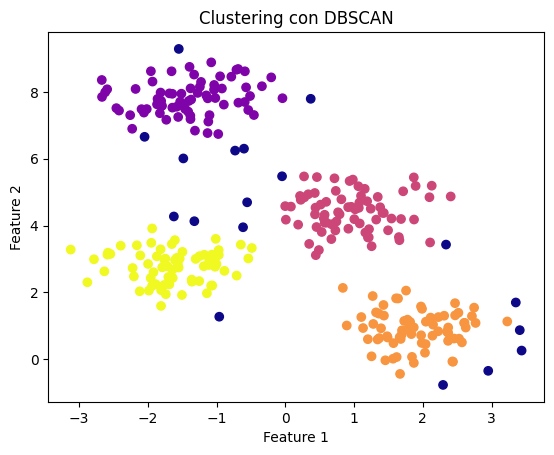

In [33]:
# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Aplicar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("Clustering con DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 3. Métricas para clustering <a name="metricas"></a>

No tenemos un resultado válido o real para comparar.

Se busca minimizar la distancia entre datos de un mismo grupo.  Datos similares entre sí.

También maximizar la distancia entre grupos. Clusters lo más distintos posibles.

La calidad del resultado la podemos medir con la inercia.

## Inercia

Medida para conocer cuánta distancia hay entre los datos y el centroide de su grupo.

Si todos los datos están cerca de sus centroides la inercia es baja. Indica buen agrupamieto!

Si los puntos están dispersos y lejos de los centroides, dará una inercia alta.
Mal agrupados!


<img src="https://drive.google.com/uc?export=view&id=11tIZ-1bnF8w19xZcSMeNjp3mOiJT44IY" height="257" width="552" style="float: center;">

In [36]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(3, 7)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Imprimir las inercias para cada k
for k, inertia in zip(k_values, inertias):
    print(f'k = {k}, Inercia = {inertia}')

k = 3, Inercia = 566.8595511244134
k = 4, Inercia = 497.03398814952124
k = 5, Inercia = 428.21421299328415
k = 6, Inercia = 375.0659248776243


### 3.1. Método del codo (elbow) <a name="elbow"></a>


El método del codo (Elbow Method) es una técnica visual utilizada para determinar el número óptimo de clusters (𝑘) en un algoritmo de clustering.

La idea principal detrás de este método es encontrar el punto donde agregar más clusters no proporciona una mejora significativa en la compactación de los clusters, medido por la inercia.

Se grafica la inercia para un rango de K grupos.

Se busca el “codo” en el gráfico resultante.
  - Observa la gráfica para identificar el punto donde la tasa de disminución de la inercia se vuelve más lenta.
  - Se produce el último decrecimiento importante.
  - El "codo" en la curva es el punto donde agregar más clusters ya no resulta en una disminución significativa de la inercia. Este punto sugiere el número óptimo de clusters.

<img src="https://drive.google.com/uc?export=view&id=1OajkMba49ZMlYnSC80nAtMz_rIxrMdDx" height="313" width="459" style="float: center;">

k = 2, Inercia = 5763.4647894614345
k = 3, Inercia = 566.8595511244134
k = 4, Inercia = 497.03398814952124
k = 5, Inercia = 428.21421299328415
k = 6, Inercia = 375.0659248776243
k = 7, Inercia = 308.19836610418264
k = 8, Inercia = 272.405731498748
k = 9, Inercia = 234.28072349591122
k = 10, Inercia = 219.0405333899987


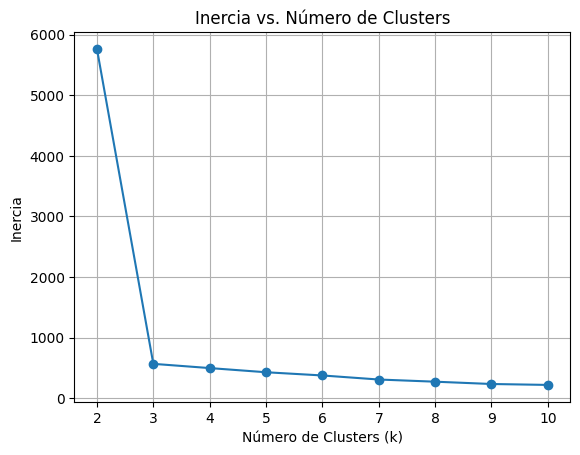

In [37]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(2, 11)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Imprimir las inercias para cada k
for k, inertia in zip(k_values, inertias):
    print(f'k = {k}, Inercia = {inertia}')

# Graficar la inercia en función de k
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Inercia vs. Número de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


  ### 3.2. Indice silueta (silhouette) <a name="silhouette"></a>

El índice de silueta (Silhouette Index) es una medida utilizada para evaluar la calidad de los clusters creados por un algoritmo de clustering.

Este índice proporciona una forma de cuantificar cuán bien se agrupan los puntos de datos dentro de sus clusters y cuán distintos son los clusters entre sí.

El valor de la silueta para un punto de datos 𝑖 se define como:

<img src="https://drive.google.com/uc?export=view&id=1TLjLIl4hiVliJU1HSr0zGYHfs55eXRQR" height="81" width="245" style="float: center;">

donde

  a(x)= distancia promedio de x a todos los demás puntos en el mismo cluster.

  b(x)= distancia promedio de x a todos los demás puntos en el cluster más cercano al que no pertenece x.

El valor de 𝑠(𝑖) oscila entre -1 y 1:
- 𝑠(𝑖) cercano a 1 indica que el punto está bien agrupado.
- 𝑠(𝑖) cercano a 0 indica que el punto está en el límite entre dos clusters.
- 𝑠(𝑖) cercano a -1 indica que el punto probablemente está mal asignado a su cluster.

<img src="https://drive.google.com/uc?export=view&id=1Xb1nvxj0pmWZEkIQAb6VC-64vJi3gn5T" height="84" width="160" style="float: center;">

k = 2, Inercia = 5763.4647894614345, Índice de Silueta = 0.7049437310743717
k = 3, Inercia = 566.8595511244134, Índice de Silueta = 0.8480303059596955
k = 4, Inercia = 497.03398814952124, Índice de Silueta = 0.6764211610337508
k = 5, Inercia = 428.21421299328415, Índice de Silueta = 0.49631564306271647
k = 6, Inercia = 375.0659248776243, Índice de Silueta = 0.5170399982662364
k = 7, Inercia = 308.19836610418264, Índice de Silueta = 0.358030586983425
k = 8, Inercia = 272.405731498748, Índice de Silueta = 0.3625632360122803
k = 9, Inercia = 234.28072349591122, Índice de Silueta = 0.37134027555333055
k = 10, Inercia = 219.0405333899987, Índice de Silueta = 0.3638824656870273


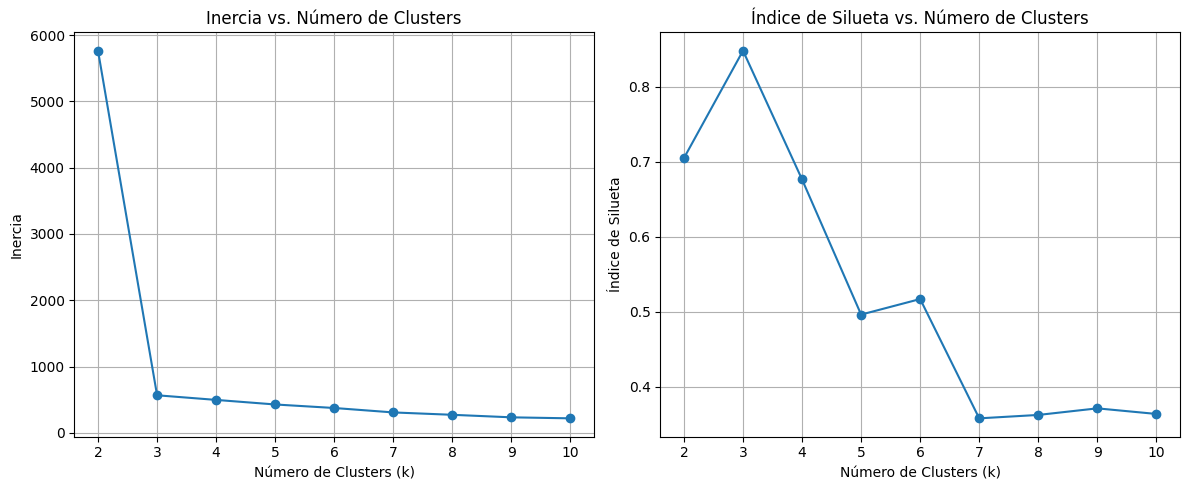

In [38]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(2, 11)
inertias = []
silhouette_scores = []

# Calcular la inercia y el índice de silueta para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Imprimir las inercias y los índices de silueta para cada k
for k, inertia, silhouette in zip(k_values, inertias, silhouette_scores):
    print(f'k = {k}, Inercia = {inertia}, Índice de Silueta = {silhouette}')

# Graficar la inercia en función de k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Inercia vs. Número de Clusters')
plt.xticks(k_values)
plt.grid(True)

# Graficar el índice de silueta en función de k
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.title('Índice de Silueta vs. Número de Clusters')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


## 4. Reducción de dimensionalidad <a name="dimensionalidad"></a>

La reducción de dimensionalidad (dimensionality reduction) es una técnica utilizada para disminuir la cantidad de características o variables en un conjunto de datos.

El objetivo principal de este modelo es simplificar la representación de los datos, manteniendo al mismo tiempo la mayor cantidad posible de información relevante.

Existen muchos motivos por los cuales querríamos utilizar este tipo de modelos para simplificar los datos. Podemos destacar:

- Simplificación y visualización de datos: En conjuntos de datos con muchas características, la reducción de dimensionalidad permite simplificar la representación de los datos y visualizarlos en espacios de menor dimensión.

- Reducción de ruido: Al reducir la dimensionalidad, se puede eliminar información redundante o ruidosa, lo que puede mejorar la calidad de los datos y el rendimiento de los modelos de aprendizaje automático.

- Eficiencia computacional: Conjuntos de datos con muchas características pueden requerir una mayor capacidad de cómputo y memoria. La reducción de dimensionalidad puede ayudar a reducir esta complejidad, lo que resulta en tiempos de entrenamiento y predicción más rápidos.

- Regularización: En algunos casos, la reducción de dimensionalidad actúa como una forma de regularización, evitando el sobreajuste (overfitting) al disminuir la complejidad del modelo.

## 4.1. Análisis de Componentes Principales <a name="pca"></a>


PCA es un método lineal que transforma los datos a un nuevo espacio de menor dimensión utilizando componentes principales que capturan la mayor variabilidad de los datos.

Imaginemos que tenemos un conjunto de datos con muchas características, como la altura, el peso, la edad, los ingresos y el nivel educativo de diferentes personas.

Cada persona representa un punto en un espacio de alta dimensión, donde cada característica es una dimensión.

El PCA nos permite encontrar nuevas direcciones o ejes en este espacio de alta dimensión, conocidos como componentes principales.

Estas direcciones representan las combinaciones lineales de las características originales que explican la mayor parte de la variabilidad de los datos.

El primer componente principal captura la mayor variabilidad posible en el conjunto de datos, el segundo componente principal captura la siguiente mayor variabilidad, y así sucesivamente.

Al utilizar el PCA, podemos elegir cuántos componentes principales deseamos mantener o que porcentaje de variabilidad preservar.

####Ejemplo 1: indicando cantidad de componentes

In [39]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un objeto PCA y ajustarlo a los datos
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [40]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

####Ejemplo 2: indicando porcentaje de variabilidad

In [47]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un objeto PCA y ajustarlo a los datos
percentage_variability = 0.98
pca = PCA(n_components = percentage_variability)
X_pca = pca.fit_transform(X)

In [48]:
X_pca

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

#### ¿Cuánto aporta cada componente? ¿Por qué se quedo con 2?

In [44]:
# Crear un objeto PCA sin especificar el número de componentes
pca = PCA()

# Ajustar PCA a los datos
pca.fit(X)

# Obtener la proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada explicada por los componentes
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [45]:
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [46]:
cumulative_variance_ratio

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

## 5. Links de interés <a name="links"></a>

- [Clustering in Machine Learning](https://www.geeksforgeeks.org/clustering-in-machine-learning/)
- [Machine Learning & Clustering: el algoritmo DBSCAN](https://datascientest.com/es/machine-learning-clustering-dbscan)
- [Comprende Principal Component Analysis](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)